In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import time
import warnings
warnings.filterwarnings("ignore")


#Importing data
data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Dow Jones Index.csv")

#Cleaning the Data
data_raw.describe(include='all')
data_raw.isnull().sum()
data_raw.percent_change_volume_over_last_wk = data_raw.percent_change_volume_over_last_wk.fillna(data_raw.percent_change_volume_over_last_wk.mean())
data_raw.previous_weeks_volume = data_raw.previous_weeks_volume.fillna(data_raw.previous_weeks_volume.mean())
data_raw.head()
# data_raw.columns[3:7]
data_raw[data_raw.columns[3:7]] = data_raw[data_raw.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
data_raw[data_raw.columns[11:13]] = data_raw[data_raw.columns[11:13]].replace('[\$,]', '', regex=True).astype(float)
data_raw.head()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_raw['stock']= label_encoder.fit_transform(data_raw['stock'])
data_raw=data_raw.drop(columns='date')
data_raw.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,0,15.82,16.72,15.78,16.42,239655616,3.79267,5.593627,1.173876e+08,16.71,15.97,-4.428490,26,0.182704
1,1,0,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,0,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,0,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,0,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029


In [22]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw)
data_scale=scaler.transform(data_raw)
# data_scale=data_raw
print(data_scale)

[[-1.040833   -1.67524673 -1.15987801 ... -1.7428646  -0.57284944
  -1.66773019]
 [-1.040833   -1.67524673 -1.13259169 ... -1.01171756 -0.72402364
  -1.65086688]
 [-1.040833   -1.67524673 -1.14853426 ...  0.52276768 -0.87519784
  -1.64385033]
 ...
 [ 0.96076892  1.67524673  0.83631507 ... -0.54652874  0.18302157
  -0.33643281]
 [ 0.96076892  1.67524673  0.8078024  ... -0.97697199  0.03184736
  -0.31787268]
 [ 0.96076892  1.67524673  0.76641305 ...  2.4028638  -0.11932684
  -0.26102944]]


[[-2.82910865  1.67349444]
 [-3.14019254  2.20938745]
 [-2.89297131  1.68534615]
 ...
 [ 1.99717004 -0.26633411]
 [ 1.8660405  -0.20738818]
 [ 1.91149464 -0.43913527]]


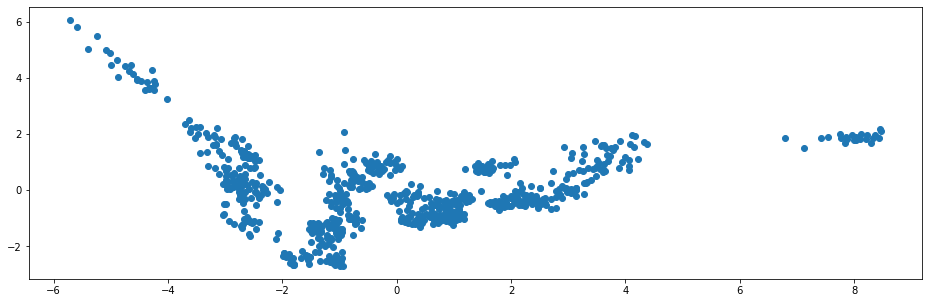

In [23]:
#Applying PCA to Data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_dow=pca.fit_transform(data_scale)
print(data_dow)
plt.scatter(data_dow[:,0], data_dow[:,1])

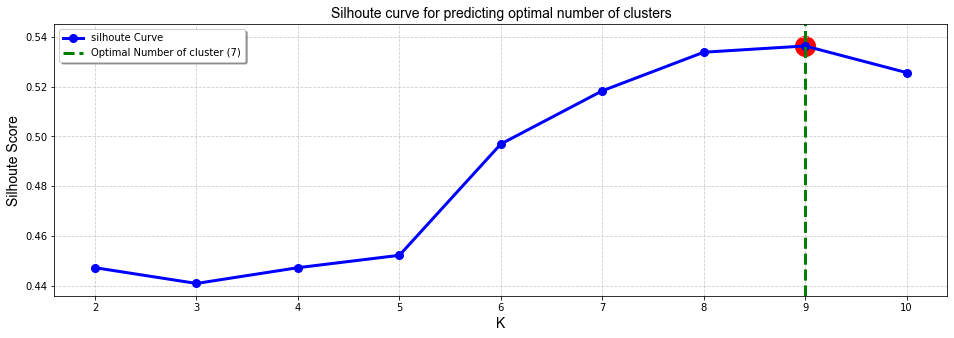

In [24]:
# importing Kmeans clustering algorithm
from sklearn.cluster import KMeans
# finding optimal Value of K in Kmeans Clustering
# K means per value of K
k_means_per_k = [KMeans(n_clusters=k).fit(data_dow) for k in range(1,11)]
# print(k_means_per_k)
silhoute_scores_per_k = [silhouette_score(data_dow,model.labels_) for model in k_means_per_k[1:]]
# print(silhoute_scores_per_k)
# ploting graph for silhoute_scores
rcParams['figure.figsize']=16,5
_ = plt.plot(range(2,11),silhoute_scores_per_k,'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
_ = plt.xlabel('K',fontsize=14,family='Arial')
_ = plt.ylabel('Silhoute Score',fontsize=14,family='Arial')
_ = plt.grid(which='major',color='#cccccc',linestyle='--')
_ = plt.title('Silhoute curve for predicting optimal number of clusters', family='Arial',fontsize=14)
k=silhoute_scores_per_k.index(max(silhoute_scores_per_k))
num_opt_clus=k+2
#line to mark optimal number of k in curve
_ = plt.axvline(x=k+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k))
_ = plt.scatter(k+2, silhoute_scores_per_k[k],c='red',s=400)
_ = plt.legend(shadow=True)
_ = plt.show()

In [25]:
data_dow_km = KMeans(n_clusters=9)
k_start_dow = time.time()
data_dow_kmfit=data_dow_km.fit(data_dow)
k_end_dow = time.time()
data_dow_kmeans=data_dow_km.fit_predict(data_dow)
k_timet_dow=k_end_dow-k_start_dow
# data_dow.shape
# data_dow_kmeans.cluster_centers_

In [26]:
print("Time taken by the KMeans algorithm:-",k_timet_dow)
print("The sum of square errors is:-",data_dow_kmfit.inertia_)
# data_dow_clustered = pd.concat([data_dow,pd.Series(data_dow_kmeans.labels_)],axis=1)
# data_dow_clustered.rename(columns={data_dow_clustered.columns[-1]:'Cluster_number'},inplace=True)
# data_dow_clustered.describe(include='all')
# data_dow_clustered.sort_values(['Cluster_number'])
silhoute_score = silhouette_score(data_dow, data_dow_kmfit.labels_)
print("The silhoute score is:-",silhoute_score)

Time taken by the KMeans algorithm:- 0.18589353561401367
The sum of square errors is:- 299.3384823787686
The silhoute score is:- 0.5362730766435787


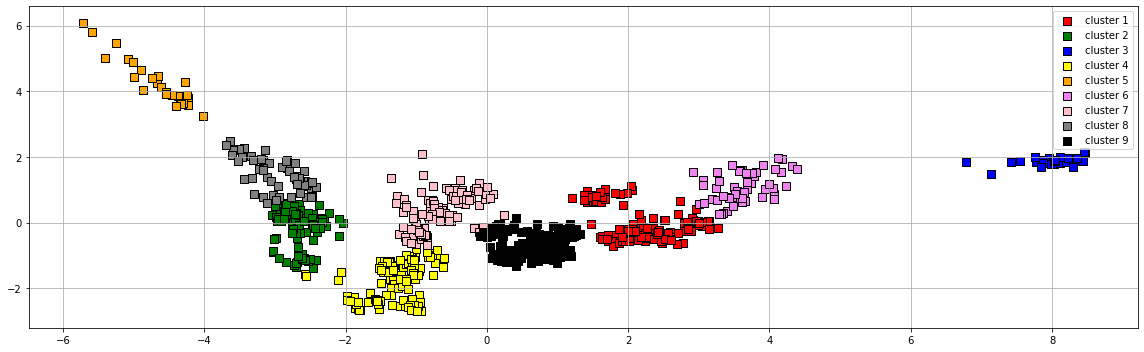

In [27]:
data_color=['red','green','blue','yellow','orange','violet','pink','grey','black']
from matplotlib import cm
for i in range(num_opt_clus):  
 plt.scatter(data_dow[data_dow_kmeans == i,0],
            data_dow[data_dow_kmeans == i,1],
            s=50, c=data_color[i],
            marker='s', edgecolor='black',
            label='cluster '+str(i+1))

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('06_02.png', dpi=300)
plt.show()

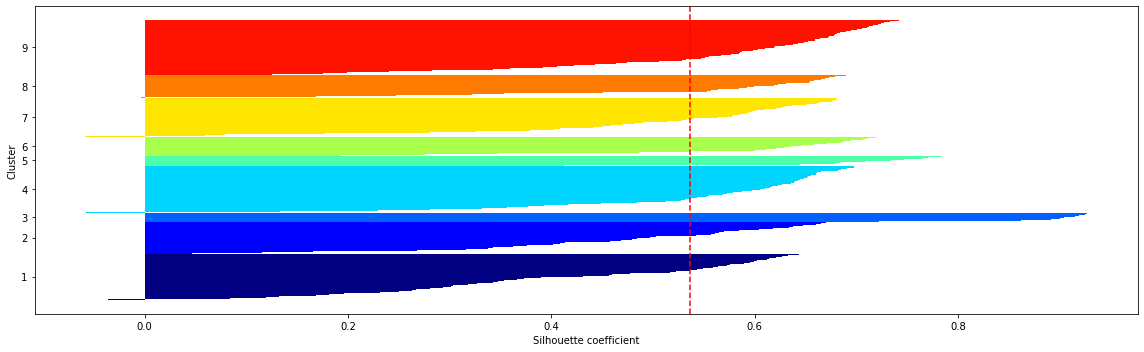

In [28]:

cluster_labels = np.unique(data_dow_kmeans)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_dow, data_dow_kmeans, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[data_dow_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('06_06.png', dpi=300)
plt.show()


Optimal eps for DBSCAN is: 0.77


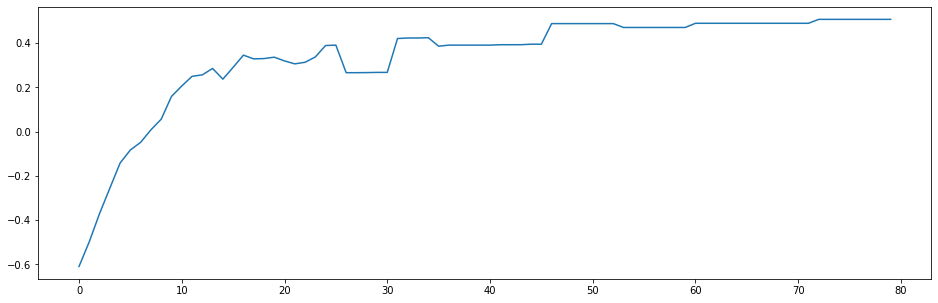

In [43]:
start= 0.0
stop= 1.0
step = 0.01
my_list = np.arange(start, stop+step, step)
# print(my_list)
sildbscan=[]
plter=[]
max_eps=0.1
max_silscore=0
for i in range(80):
    db = DBSCAN(eps=.05+my_list[i],min_samples=4)
    data_dbscan = db.fit(data_dow)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if(n_clusters_>0):
     sil_score=metrics.silhouette_score(data_dow,labels)
     sildbscan.append(sil_score)
     plter.append(i)
     if(sil_score>max_silscore):
            max_silscore=sil_score
            max_eps=0.05+my_list[i]
# print(sildbscan)
print("Optimal eps for DBSCAN is:",max_eps)
plt.plot(plter,sildbscan)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 0
Time Taken by DBSCAN Algorithm:- 0.017988920211791992
Silhouette Coefficient: 0.508


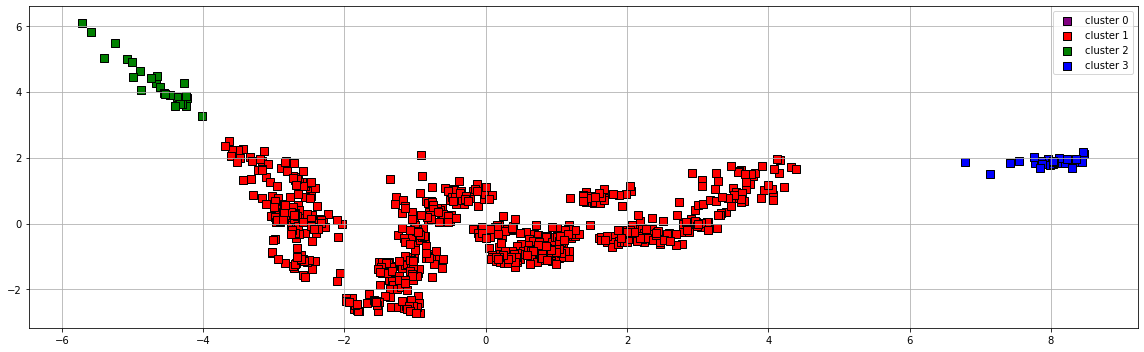

In [49]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db=DBSCAN(eps=.77, min_samples=4)
db_start_time=time.time()
data_dbscan=db.fit(data_dow)
db_end_time=time.time()
db_timet=db_end_time-db_start_time
data_dbs=db.fit_predict(data_dow)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Time Taken by DBSCAN Algorithm:-",db_timet)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data_dow, labels))
data_color=['red','green','blue','yellow','orange','violet','pink','grey','black','purple']
# for i in range(-1,num_opt_clus):  
#  plt.scatter(data_dow[data_dbs == i,0],
#             data_dow[data_dbs == i,1],
#             s=50, c=data_color[i],
#             marker='s', edgecolor='black',
#             label='cluster '+str(i+1))
for i in range(-1,n_clusters_):  
  plt.scatter(data_dow[data_dbs == i,0],
            data_dow[data_dbs == i,1],
            s=50, c=data_color[i],
            marker='s', edgecolor='black',
            label='cluster '+str(i+1))
# plt.scatter(data_dow[data_dbs == -1,0],
#             data_dow[data_dbs == -1,1],
#             s=50, c=data_color[0],
#             marker='s', edgecolor='black',
#             label='cluster '+str(1))
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('06_02.png', dpi=300)
plt.show()

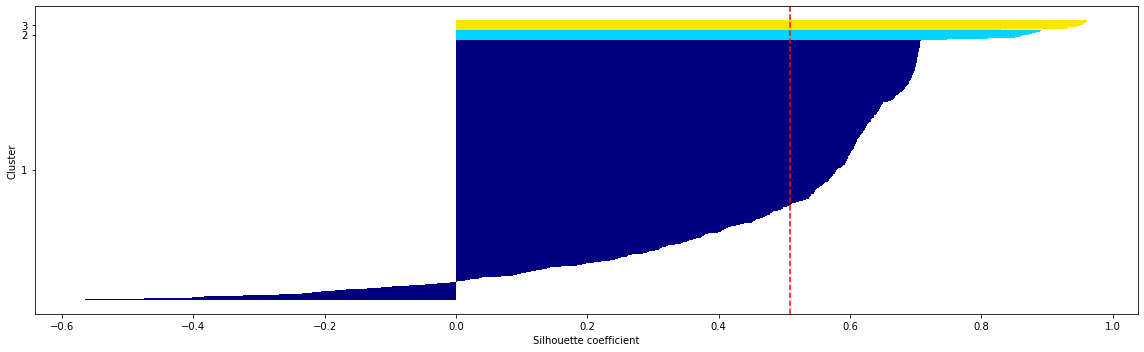

In [50]:
cluster_labels = np.unique(data_dbs)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_dow, data_dbs, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[data_dbs == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
#     if(c_silhouette_vals[i]>=0):
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

     

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('06_06.png', dpi=300)
plt.show()

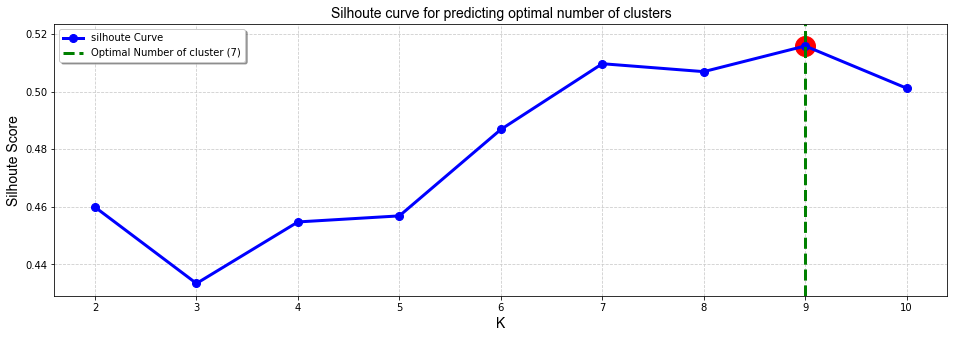

In [51]:
from sklearn.cluster import AgglomerativeClustering
# finding optimal Value of K in Kmeans Clustering
# K means per value of K
n_clust_per_n = [AgglomerativeClustering(n).fit(data_dow) for n in range(1,11)]
# print(k_means_per_k)
silhoute_scores_per_n = [silhouette_score(data_dow,model.labels_) for model in n_clust_per_n[1:]]
# print(silhoute_scores_per_n)
# ploting graph for silhoute_scores
rcParams['figure.figsize']=16,5
_ = plt.plot(range(2,11),silhoute_scores_per_n,'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
_ = plt.xlabel('K',fontsize=14,family='Arial')
_ = plt.ylabel('Silhoute Score',fontsize=14,family='Arial')
_ = plt.grid(which='major',color='#cccccc',linestyle='--')
_ = plt.title('Silhoute curve for predicting optimal number of clusters', family='Arial',fontsize=14)
n=silhoute_scores_per_n.index(max(silhoute_scores_per_n))
num_opt_clus=n+2
#line to mark optimal number of k in curve
_ = plt.axvline(x=n+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k))
_ = plt.scatter(n+2, silhoute_scores_per_n[n],c='red',s=400)
_ = plt.legend(shadow=True)
_ = plt.show()

In [52]:
ac = AgglomerativeClustering(n_clusters=9,
                             affinity='euclidean',
                             linkage='complete')
ac_start_time=time.time()
ac_fit= ac.fit(data_dow)
ac_end_time=time.time()
ac_labels = ac.fit_predict(data_dow)
# print('Cluster labels: %s' % labels)
ac_timet=ac_end_time-ac_start_time
print("Time taken by agglomerative clustering:-",ac_timet)

# sse=ac_fit.score(data_dow)
# # print("The sum of squre errors:-",sse)
# SSE = np.absolute(sse)
# print("The sum of square errors is:-",SSE)
# data_dow_clustered = pd.concat([data_dow,pd.Series(ac.labels_)],axis=1)
# data_dow_clustered.rename(columns={data_dow_clustered.columns[-1]:'Cluster_number'},inplace=True)
# data_dow_clustered.describe(include='all')
# data_dow_clustered.sort_values(['Cluster_number'])
silhoute_score = silhouette_score(data_dow, ac.labels_)
print("The silhoute score is:",silhoute_score)


Time taken by agglomerative clustering:- 0.05719327926635742
The silhoute score is: 0.47924463211689183


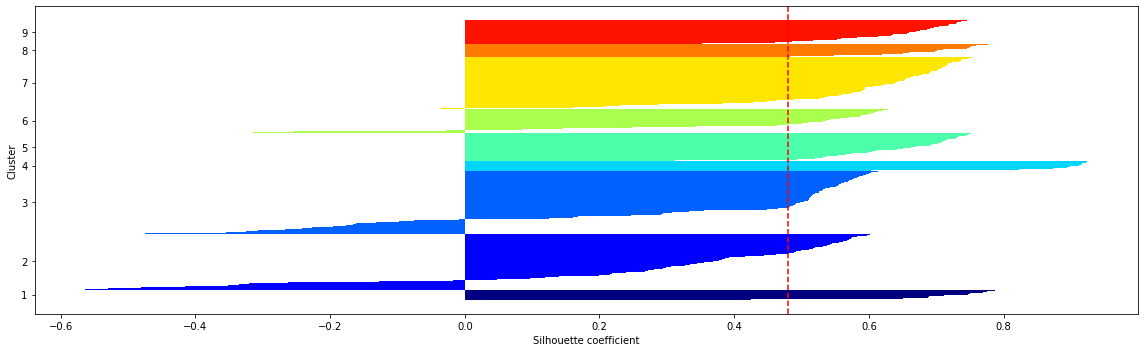

In [53]:
cluster_labels = np.unique(ac_labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_dow, ac_labels, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[ac_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
#     if(c_silhouette_vals[i]>=0):
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

     

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('06_06.png', dpi=300)
plt.show()